In [269]:
import matplotlib
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [270]:
mvps = pd.read_csv("mvps.csv")

In [271]:
# cleaning up mvps for only necessary columns
mvps = mvps[["Player", "Year", "Votes", "Share"]]
mvps['Share'] = mvps['Share'].str.replace('%', '').astype(float)

mvps.to_csv("cleaned-mvps.csv")

mvps

,Player,Year,Votes,Share
0,Marshall Faulk,2000,24.0,48.0
1,Donovan McNabb,2000,11.0,22.0
2,Eddie George,2000,8.0,16.0
3,Rich Gannon,2000,5.0,10.0
4,Ray Lewis,2000,1.0,2.0
...,...,...,...,...
81,Patrick Mahomes,2022,48.0,96.0
82,Jalen Hurts,2022,1.0,2.0
83,Josh Allen,2022,1.0,2.0
84,Lamar Jackson,2023,49.0,98.0


In [272]:
# cleaning all player data
passing = pd.read_csv("passing.csv")

del passing["Unnamed: 0"]
del passing["Rk"]

passing["QBrec"] = passing["QBrec"].astype(str)

passing["Player"] = passing["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
passing["Player"] = passing["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
passing = passing[passing['Pos'] == 'QB'] # filtering qbs

passing = passing[["Player", "Tm", "Pos", "G", "GS", "Cmp", "Att", "Yds", "TD", "Int", "Year"]]

passing.rename(columns={'Att': 'PassAtt'}, inplace=True)
passing.rename(columns={'Yds': 'PassYds'}, inplace=True)
passing.rename(columns={'TD': 'PassTD'}, inplace=True)
passing.rename(columns={'Int': 'PassInt'}, inplace=True)

passing.to_csv("cleaned-passing.csv")

passing[passing["Player"] == "Joshua Dobbs"]

,Player,Tm,Pos,G,GS,Cmp,PassAtt,PassYds,PassTD,PassInt,Year
1864,Joshua Dobbs,PIT,QB,5,0,6,12,43,0,1,2018
2109,Joshua Dobbs,PIT,QB,1,0,4,5,2,0,0,2020
2290,Joshua Dobbs,TEN,QB,2,2,40,68,411,2,2,2022
2364,Joshua Dobbs,MIN,QB,13,12,262,417,2464,13,10,2023


In [273]:
receiving = pd.read_csv("receiving.csv")

del receiving["Unnamed: 0"]
del receiving["Rk"]

receiving["Player"] = receiving["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
receiving["Player"] = receiving["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
receiving = receiving[receiving['Pos'].isin(['WR', 'RB', 'TE'])] # filtering wrs/rbs/tes

receiving = receiving[["Player", "Tm", "Pos", "G", "GS", "Rec", "Yds", "TD", "Year"]]

receiving.rename(columns={'Yds': 'RecYds'}, inplace=True)
receiving.rename(columns={'TD': 'RecTD'}, inplace=True)

receiving = receiving.sort_values(by=['Year', 'RecYds'], ascending=[True, False])

receiving.to_csv("cleaned-receiving.csv")

receiving

,Player,Tm,Pos,G,GS,Rec,RecYds,RecTD,Year
14,Torry Holt,STL,WR,16,15,82,1635,6,2000
3,Rod Smith,DEN,WR,16,16,100,1602,8,2000
12,Isaac Bruce,STL,WR,16,16,87,1471,9,2000
4,Terrell Owens,SFO,WR,14,13,97,1451,13,2000
20,Randy Moss,MIN,WR,16,16,77,1437,15,2000
...,...,...,...,...,...,...,...,...,...
11486,Rodney Williams,PIT,TE,13,0,0,0,0,2023
11487,Juwann Winfree,IND,WR,8,1,0,0,0,2023
11431,Chris Evans,CIN,RB,8,0,1,-1,0,2023
11457,James Robinson,GNB,RB,1,0,1,-2,0,2023


In [274]:
rushing = pd.read_csv("rushing.csv")

del rushing["Unnamed: 0"]
del rushing["Rk"]


rushing["Player"] = rushing["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
rushing["Player"] = rushing["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
rushing = rushing[rushing['Pos'].isin(['RB', 'QB'])] # filtering rbs/qbs

rushing = rushing[["Player", "Tm", "Pos", "G", "GS", "Att", "Yds", "TD", "Year"]]

rushing.rename(columns={'Att': 'RushAtt'}, inplace=True)
rushing.rename(columns={'Yds': 'RushYds'}, inplace=True)
rushing.rename(columns={'TD': 'RushTD'}, inplace=True)

rushing = rushing.sort_values(by=['Year', 'RushYds'], ascending=[True, False])

rushing.to_csv("cleaned-rushing.csv")

rushing.head(10)

,Player,Tm,Pos,G,GS,RushAtt,RushYds,RushTD,Year
1,Edgerrin James,IND,RB,16,16,387,1709,13,2000
10,Robert Smith,MIN,RB,16,16,295,1521,7,2000
0,Eddie George,TEN,RB,16,16,403,1509,14,2000
9,Mike Anderson,DEN,RB,16,12,297,1487,15,2000
6,Corey Dillon,CIN,RB,16,16,315,1435,7,2000
12,Fred Taylor,JAX,RB,13,13,292,1399,12,2000
7,Jamal Lewis,BAL,RB,16,13,309,1364,6,2000
18,Marshall Faulk,STL,RB,14,14,253,1359,18,2000
2,Jerome Bettis,PIT,RB,16,16,355,1341,8,2000
4,Stephen Davis,WAS,RB,15,15,332,1318,11,2000


In [275]:
defense = pd.read_csv("defense.csv")

del defense["Unnamed: 0"]
del defense["Rk"]

defense["Player"] = defense["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
defense["Player"] = defense["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
defense = defense[~defense['Pos'].isin(['RB', 'QB', 'K', 'WR', 'TE', 'T', 'G', 'OL', 'LS', 'C', 'FB', 
                                        'K-P', 'LG', 'P', 'RG'])] # filtering offensive positions

defense = defense[["Player", "Tm", "Pos", "G", "GS", "Solo", "Sk", "Int", "Year"]]

defense.rename(columns={'Int': 'Int'}, inplace=True)

defense.to_csv("cleaned-defense.csv")

defense

,Player,Tm,Pos,G,GS,Solo,Sk,Int,Year
0,Derrick Brooks,TAM,RLB,16,16,123.0,1.0,1.0,2000
1,Ronald McKinnon,ARI,MLB,16,16,119.0,4.0,0.0,2000
2,Anthony Simmons,SEA,LLB,16,16,119.0,4.0,2.0,2000
3,Pat Tillman,ARI,SS,16,16,118.0,1.5,1.0,2000
4,Donnie Edwards,KAN,RLB,16,16,114.0,1.0,2.0,2000
...,...,...,...,...,...,...,...,...,...
32150,Tyreke Smith,2TM,LB,3,0,0.0,0.0,NaN,2023
32166,Kiondre Thomas,GNB,CB,1,0,NaN,0.0,NaN,2023
32174,Payton Turner,NOR,DE,2,0,0.0,0.0,NaN,2023
32175,Nick Vigil,MIN,LB,8,0,0.0,0.0,NaN,2023


In [276]:
# combining all player data and merging with mvps
player_data = passing.merge(receiving, how="outer", on=["Player", "Year", "Tm", "Pos", "G", "GS"])\
                .merge(rushing, how="outer", on=["Player", "Year", "Tm", "Pos", "G", "GS"])\
                .merge(defense, how="outer", on=["Player", "Year", "Tm", "Pos", "G", "GS"])

player_data.to_csv("player-data.csv")

combined = player_data.merge(mvps, how="outer", on=["Player", "Year"])
combined[["Cmp", "PassAtt", "PassYds", "PassTD", "PassInt", "Rec", "RecYds", "RecTD", 
                     "RushAtt", "RushYds", "RushTD", "Solo", "Sk", "Int", "Votes", "Share"]] =\
                    combined[["Cmp", "PassAtt", "PassYds", "PassTD", "PassInt", "Rec",
                              "RecYds", "RecTD", "RushAtt", "RushYds", "RushTD", "Solo", "Sk", "Int", "Votes", "Share"]].fillna(0)
combined = combined[~combined["Tm"].str.contains("TM")]

combined.to_csv("combined.csv")

In [277]:
# cleaning up team data
teams = pd.read_csv("teams.csv")

del teams["Unnamed: 0"]
teams["Tm"] = teams["Tm"].str.replace("*", "", regex=False) # removing division winner indicator
teams["Tm"] = teams["Tm"].str.replace("+", "", regex=False) # removing wildcard indicator

teams.rename(columns={'Tm': 'Team'}, inplace=True)

teams.to_csv("cleaned-teams.csv")

teams

,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Year
0,Miami Dolphins,11,5,0.688,323,226,97,6.1,1.0,7.1,0.0,7.1,2000
1,Indianapolis Colts,10,6,0.625,429,326,103,6.4,1.5,7.9,7.1,0.8,2000
2,New York Jets,9,7,0.563,321,321,0,0.0,3.5,3.5,1.4,2.2,2000
3,Buffalo Bills,8,8,0.500,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,2000
4,New England Patriots,5,11,0.313,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,Carolina Panthers,2,15,0.118,236,416,-180,-10.6,0.7,-9.9,-7.9,-2.0,2023
762,San Francisco 49ers,12,5,0.706,491,298,193,11.4,0.4,11.8,7.1,4.7,2023
763,Los Angeles Rams,10,7,0.588,404,377,27,1.6,1.4,3.0,2.0,1.0,2023
764,Seattle Seahawks,9,8,0.529,364,402,-38,-2.2,1.3,-1.0,-0.2,-0.8,2023


In [278]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [279]:
combined["Team"] = combined["Tm"].map(nicknames)

# for washington as they have gone through multiple name changes under the same abbreviation
def adjust_team_name(row):
    if row['Tm'] == 'WAS':  # Assuming 'WAS' is the abbreviation used
        if row['Year'] < 2020:
            return 'Washington Redskins'
        elif 2020 <= row['Year'] < 2022:
            return 'Washington Football Team'
        else:
            return 'Washington Commanders'
    return row['Team']

# Adjusting the team names
combined['Team'] = combined.apply(adjust_team_name, axis=1)

combined.to_csv("combined.csv")

In [280]:
stats = combined.merge(teams, how="outer", on=["Team", "Year"])
stats = stats.apply(pd.to_numeric, errors="ignore")

stats.to_csv("mvp-stats.csv")

<Axes: xlabel='Player'>

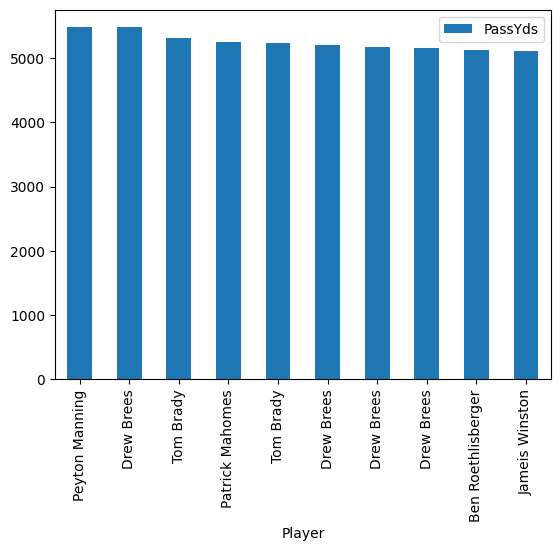

In [281]:
highest_scoring = stats[stats["G"] > 15].sort_values("PassYds", ascending=False).head(10)
highest_scoring.plot.bar("Player", "PassYds")

<Axes: >

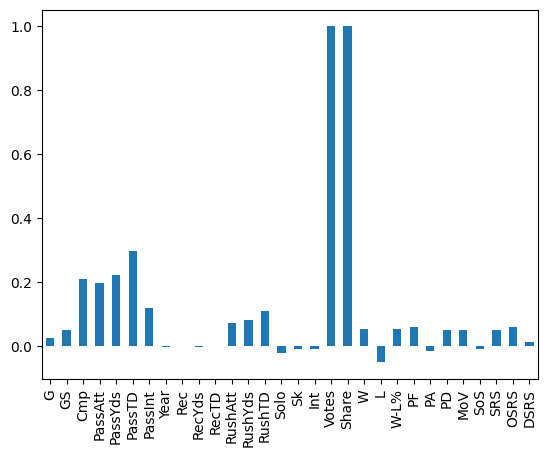

In [282]:
numeric_stats = stats.select_dtypes(include=['number'])
correlation = numeric_stats.corr()["Share"]


correlation.plot.bar() # IT'S A QB AWARD NOOOOOOOOOOOOOO